## CBOF on the synthetic dataset

### Let's try CBOF code on a larger dataset and let's show the results the same way we showed in case of LOF

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd
from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
sns.set()

In [2]:
data = np.load('clusterable_data.npy')

### Let's see once again how the data actually looks like

In [3]:
a=tuple(zip(*data))

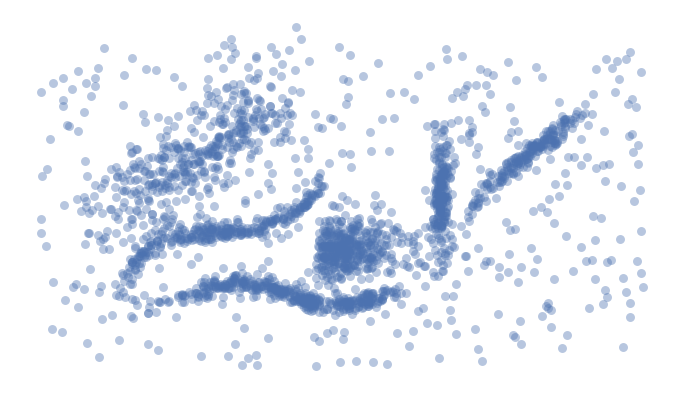

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(a[0], a[1], c='b', alpha= 0.40, s=80, linewidths=0)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
#frame.spines[['all']].set_visible(False)
#frame.spines['bottom'].set_visible(False)
#frame.spines['left'].set_visible(False)
frame.axis("off");

### Let's apply CBOF on this and see the results

In [6]:
from scipy.spatial import distance

In [7]:
neighbours=20
clf = LocalOutlierFactor(n_neighbors=neighbours, contamination=0.01)

In [8]:
clf.fit_predict(data)
p=clf.kneighbors(data,n_neighbors=neighbours+1)

### There is no predefined function created for CBOF, so I we have to create one

### Below is the distance measure function which finds the CBOF values for each point as per the formula i.e. mentioned in the documentation

In [9]:
dist=[]
for j in range(len(data)):
    n1=0
    n2=0
    listy=data[p[1][j]].tolist()
    n1=n1+np.triu(distance.cdist(listy, listy, 'euclidean'),0).sum()
    k=listy.pop(0)
    n2=n2+np.triu(distance.cdist(listy, listy, 'euclidean'),0).sum()
    dist.append(1-(n2/n1))

In [10]:
X_scores=np.array(dist)

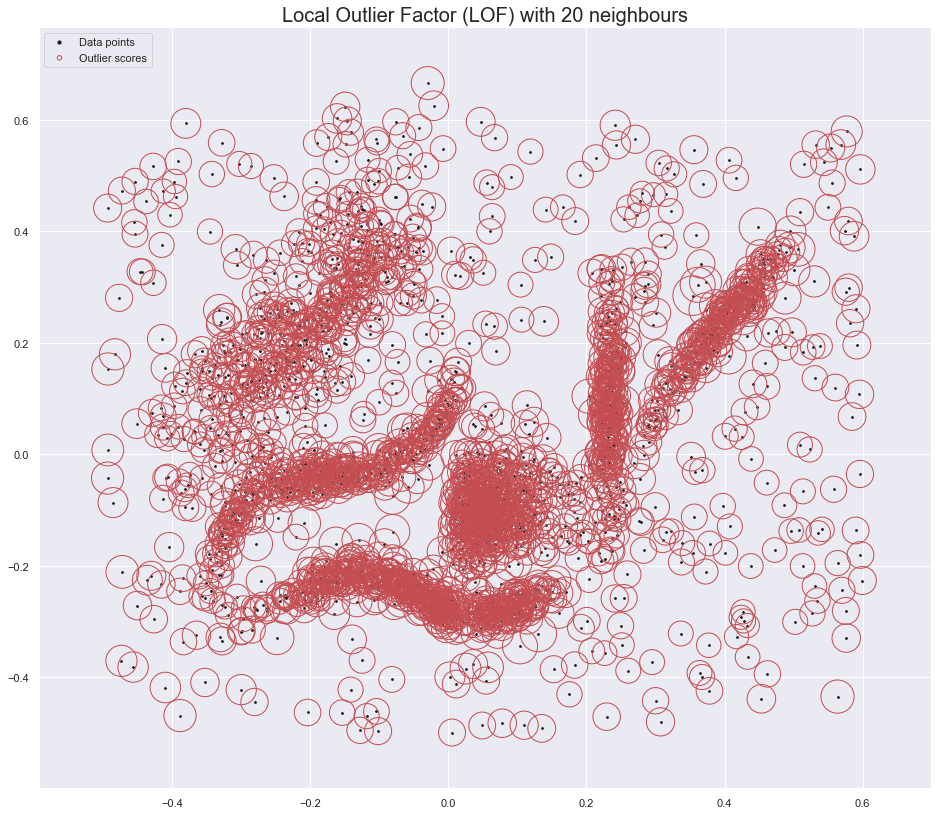

In [11]:
plt.figure(figsize=(16,14))

plt.title(f"Local Outlier Factor (LOF) with {neighbours} neighbours",fontsize=20)
plt.scatter(data[:, 0], data[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = X_scores / (X_scores.max() - X_scores.min())
plt.scatter(data[:, 0], data[:, 1], s=radius*1000, edgecolors='r', facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim(min(a[0])-0.1, max(a[0])+0.1)
plt.ylim(min(a[1])-0.1, max(a[1])+0.1)
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### We clearly see that CBOF doesn't seem to be working that well with a dataset having such dense and close by values.

### Let's try it some other dataset

### Let's create one where we have 3 dense clusters and some far away random values which we obviously know would be outliers

In [12]:
from sklearn.datasets.samples_generator import make_blobs

In [13]:
from sklearn.datasets.samples_generator import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2,random_state=0)

n=[[4,2]]
k=np.append(X,n,axis=0)

In [14]:
n=[[4,2],[2,4],[4,4],[-1,-1],[1,3],[3,-1]]

In [15]:
k=np.append(X,n,axis=0)

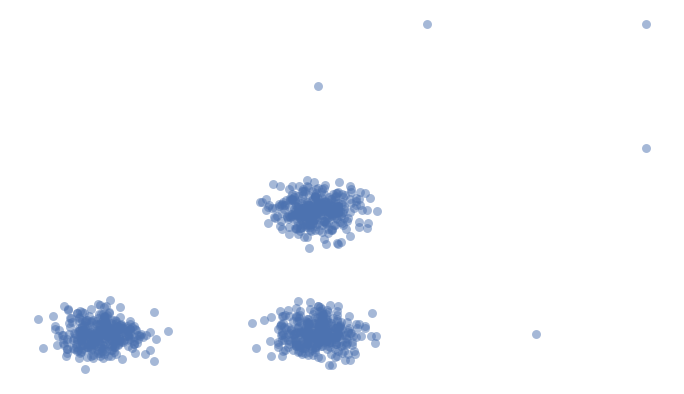

In [16]:
a=tuple(zip(*k))

plt.figure(figsize=(12,7))
plt.scatter(a[0], a[1], c='b', alpha= 0.50, s=80, linewidths=0)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
#frame.spines[['all']].set_visible(False)
#frame.spines['bottom'].set_visible(False)
#frame.spines['left'].set_visible(False)
frame.axis("off");

### As we clearly see the outliers lying around our dense clusters

### Let's apply CBOF on this

In [17]:
neighbours=20
clf = LocalOutlierFactor(n_neighbors=neighbours, contamination=0.01)

In [18]:
clf.fit_predict(k)
l=clf.kneighbors(k,n_neighbors=neighbours+1)

In [19]:
dist=[]
for j in range(len(k)):
    n1=0
    n2=0
    listy=k[l[1][j]].tolist()
    n1=n1+np.triu(distance.cdist(listy, listy, 'euclidean'),0).sum()
    b=listy.pop(0)
    n2=n2+np.triu(distance.cdist(listy, listy, 'euclidean'),0).sum()
    dist.append(1-(n2/n1))

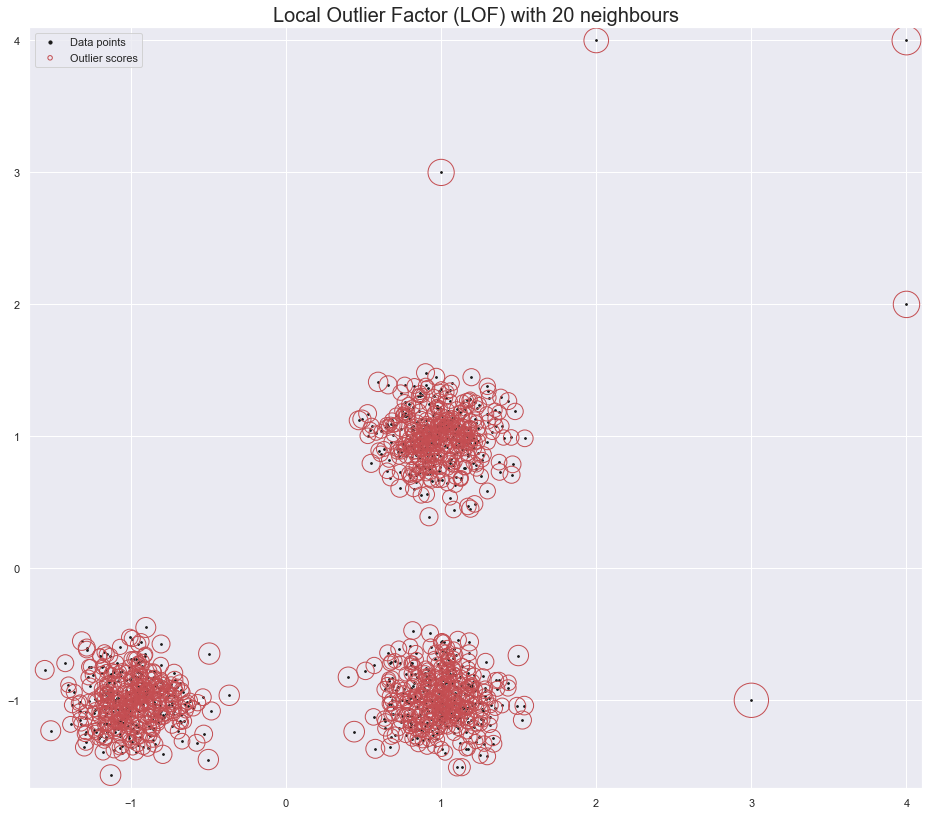

In [20]:
X_scores=np.array(dist)
plt.figure(figsize=(16,14))

plt.title(f"Local Outlier Factor (LOF) with {neighbours} neighbours",fontsize=20)
plt.scatter(k[:, 0], k[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = X_scores/ (X_scores.max() - X_scores.min())
plt.scatter(k[:, 0], k[:, 1], s=radius*1000, edgecolors='r', facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim(min(a[0])-0.1, max(a[0])+0.1)
plt.ylim(min(a[1])-0.1, max(a[1])+0.1)
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### And we see, CBOF giving a more improved differenced result for the dataset which has clear outliers attached to it.

### So as we saw in the documentation itself, CBOF has only a few benefits, like it does signify the difference in position of values and give different scores to the points but the issue of identifying outliers is still existing. At times we usually won't have such dense clusters with few outliers.

### So that's all about CBOF